# MSN 514 - Chapter 10: Wolfram

## ELementary Cellular Automata (ECA)

### ECA basic

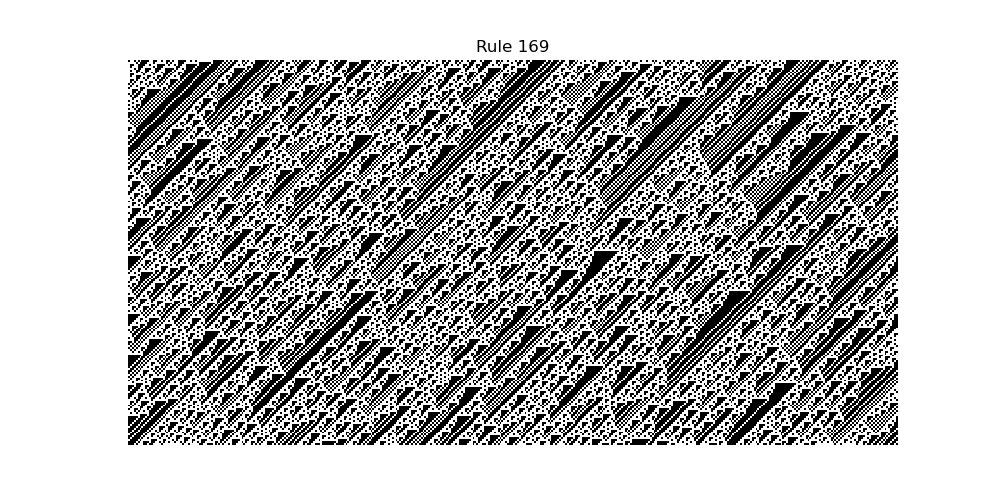

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

N = 400 # Number of cells
T = 200 # Number of time steps
rule = 169 # Rule to use

r = format(rule, '08b') # Convert the rule to binary
r = np.array([int(i) for i in r]) # Convert the binary rule to an array

s = np.zeros((T, N), dtype=int) # Initial state
s[0, :] = np.random.randint(0, 2, N)  # Random initial state
# s[0, N//2] = 1  # Set the middle cell to 1

for t in range(T - 1):
    indices = 7 - (4 * np.roll(s[t], 1) + 2 * s[t] + np.roll(s[t], -1))
    s[t+1, :] = r[indices]

# Plot the results
plt.figure(figsize=(10, 5))
plt.imshow(s, cmap='Greys', interpolation='nearest')
plt.title(f'Rule {rule}')
plt.gca().set_aspect('equal', adjustable='box')
plt.axis('off')
plt.show()

### ECA widget

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
%matplotlib inline

def eca(rule):
    N = 200 # Number of cells
    T = 100 # Number of time steps

    r = format(rule, '08b') # Convert the rule to binary
    r = np.array([int(i) for i in r]) # Convert the binary rule to an array

    s = np.zeros((T, N), dtype=int) # Initial state
    # s[0, :] = np.random.randint(0, 2, N)  # Random initial state
    s[0, N//2] = 1  # Set the middle cell to 1

    for t in range(T - 1):
        indices = 7 - (4 * np.roll(s[t], 1) + 2 * s[t] + np.roll(s[t], -1))
        s[t+1, :] = r[indices]

    # Plot the results
    plt.figure(figsize=(10, 5))
    plt.imshow(s, cmap='Greys', interpolation='nearest')
    plt.title(f'Rule {rule}')
    plt.gca().set_aspect('equal', adjustable='box')
    plt.axis('off')
    plt.show()

# Create an IntSlider for rules with integer precision and larger width
rule_slider = widgets.IntSlider(
    value=0,    # Initial value
    min=0,      # Minimum value
    max=255,    # Maximum value
    step=1,     # Step size (integer increment)
    description='Rule:',  # Description of the slider
    readout_format='d',  # Decimal integer format
    style={'description_width': 'initial'},  # Prevents the description from being cut off
    layout=widgets.Layout(width='1000px')  # Adjusts the width as needed
)

# Display the plot with the interactive slider
# widgets.interact(renormalization, alpha=alpha_slider, rc=rc_slider)

widgets.interact(eca, rule=rule_slider)

interactive(children=(IntSlider(value=0, description='Rule:', layout=Layout(width='1000px'), max=255, style=Sl…

<function __main__.eca(rule)>

## Conway's Game of Life

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from IPython.display import clear_output
%matplotlib inline

N = 100
a = np.random.randint(2, size=(N, N))

# Define the convolution kernel
kernel = np.array([[1, 1, 1],
                   [1, 0, 1],
                   [1, 1, 1]])

for n in range(10000):
    # Perform 2D convolution
    b = convolve2d(a, kernel, mode='same', boundary='wrap')

    # Growth and decay
    a += (1-a)*(b==3) - a*((b<2) + (b>3))

    if (n % 1 == 0):
        clear_output(wait=True)
        plt.figure(figsize=(6, 6))
        plt.imshow(a)
        plt.axis('off')
        plt.show()

KeyboardInterrupt: 

<Figure size 600x600 with 0 Axes>

## Logistic Game of Life

In [8]:
lmd = 0.84
t1 = 1.5
t2 = 2.5
t3 = 3.5

N = 40
M = 20

a = np.zeros((N,N))
# a[N//2-M//2:N//2+M//2,N//2-M//2:N//2+M//2] = np.random.random((M,M))

a[N//2:N//2+3,N//2:N//2+3] = np.array([[lmd, 0, 0],
                                                       [lmd, 0, lmd],
                                                       [lmd, 0, 0]])

# Define the convolution kernel
kernel = np.array([[1, 1, 1],
                   [1, 0, 1],
                   [1, 1, 1]])

for n in range(100):
    # Perform 2D convolution
    b = convolve2d(a, kernel, mode='same', boundary='wrap')

    # Growth and decay
    a += lmd*((1-a)*(b >= t2)*(b <= t3) - a*((b < t1) + (b > t3)))

    if (n % 1 == 0):
        clear_output(wait=True)
        plt.imshow(a)
        plt.axis('off')
        plt.show()


KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

: 

## Pygame LGOL

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
import pygame

# Parameters
lmd = 1
t1 = 1.5
t2 = 2.5
t3 = 3.5

N = 300
M = 40
R = 4

a = np.zeros((N,N))
a[N//2-M//2:N//2+M//2,N//2-M//2:N//2+M//2] = np.random.random((M,M))

# a[N//2:N//2+3,N//2:N//2+3] = np.array([[lmd, 0, 0],
#                                        [lmd, 0, lmd],
#                                        [lmd, 0, 0]])

# Define the convolution kernel
kernel = np.array([[1, 1, 1],
                   [1, 0, 1],
                   [1, 1, 1]])

def lgol_step(kernel, a, lmd=lmd):
    # Perform 2D convolution
    b = convolve2d(a, kernel, mode='same', boundary='wrap')
    # Growth and decay
    a += lmd*((1-a)*(b >= t2)*(b <= t3) - a*((b < t1) + (b > t3)))
    return a

# Initialize pygame
pygame.init()

# Set up the display
screen = pygame.display.set_mode((R*N, R*N))
pygame.display.set_caption("Game of Life Animation")

# Set up the clock
clock = pygame.time.Clock()

# Set up font
font = pygame.font.Font(None, 36)  # None uses the default font, 72 is the size

# Function to render text
def display_text(text):
    text_surface = font.render(text, True, (255, 255, 255))  # True for anti-aliased text
    text_rect = text_surface.get_rect()
    text_rect.center = (100, 50)
    screen.blit(text_surface, text_rect)

running = True
while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.KEYDOWN:
            if event.key == pygame.K_r:
                a = np.random.random((N,N))
            elif event.key == pygame.K_c:
                lmd = 1.0
            elif event.key == pygame.K_v:
                lmd = 1.3
            elif event.key == pygame.K_s:
                lmd = lmd - 0.01
            elif event.key == pygame.K_w:
                lmd = lmd + 0.01

    # Update the state
    for i in range(1):
        a = lgol_step(kernel, a, lmd=lmd)

    s = np.repeat(np.repeat(a,R,axis=0),R,axis=1).T*255

    # Create a new Pygame surface
    surface = pygame.surfarray.make_surface(s)

    # Blit the new surface onto the window
    screen.blit(surface, (0, 0))

    display_text(f"lmd = {lmd:.2f}")

    # Update the display
    pygame.display.flip()

    # Limit the frame rate
    clock.tick(1000)

# Quit pygame
pygame.quit()

KeyboardInterrupt: 